<a href="https://colab.research.google.com/github/keto08/Employee-Retention-Analysis/blob/master/Employee_Retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Employee Retention Case Study - Figuring out which employees may quit and who would stay

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#loading employee data
file_name = "https://raw.githubusercontent.com/keto08/Employee-Retention-Analysis/master/hr_data.csv"
hr_df = pd.read_csv(file_name)
hr_df#.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low


In [23]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [5]:
# View columns that are categorical
hr_df.select_dtypes(exclude=['int', 'float']).columns

Index(['department', 'salary'], dtype='object')

In [6]:
#loading employee satisfaction data
file_name = "https://raw.githubusercontent.com/keto08/Employee-Retention-Analysis/master/employee_satisfaction_evaluation.xlsx"
emp_sat = pd.read_excel(file_name)
emp_sat#.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52
...,...,...,...
14994,87670,0.40,0.57
14995,87673,0.37,0.48
14996,87679,0.37,0.53
14997,87681,0.11,0.96


### Join both tables


In [7]:
main_df = hr_df.set_index('employee_id').join(emp_sat.set_index('EMPLOYEE #'))
main_df = main_df.reset_index()
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [8]:
#checking for null values
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


##### so we have few NaN values in the evaluation part, which will have to be filled by the general mean of all values

In [9]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
main_df.fillna(main_df.mean(), inplace=True)
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [15]:
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation


In [16]:
# don't need a unique value like employee ID
main_df_final = main_df.drop(columns='employee_id')
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


#### EDA

In [17]:
main_df_final.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [18]:
main_df_final.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [20]:
main_df_final['department'].value_counts().to_frame()

,department
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739
management,630


In [29]:
main_df_final['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

No handles with labels found to put in legend.


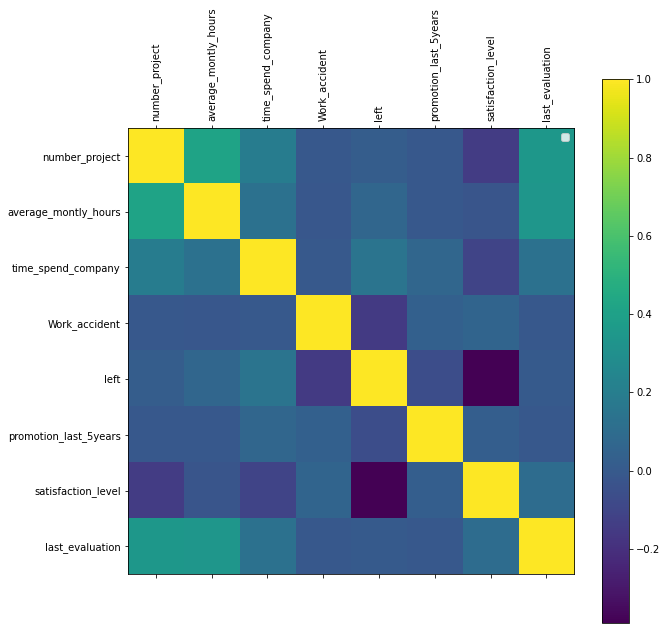

In [31]:
#corelation matrix
def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(main_df_final)

##### time spend and left are strongly related while satisfaction level and left are weakly related - makes sense

#### Let's prepare the dataset for modelling